실전기계학습 LAB #P01

소프트웨어융합학과 2018102111 서보민

1. [Exercise 2-1] 

1) linear prediction model의 예시들을 2개 이상 드시오. 

Linear prediction model에 사용되는 기법으로는 Lasso Regression, Ridge Regression, Linear Regression, Logistic Regression 등이 있습니다.


Linear prediction model을 사용하여 데이터를 얻을 수 있는 예시로는 다음과 같은 것들이 있습니다.

- 공부 시간에 따른 학업 성취도
- 지하철 역과의 거리에 따른 부동산의 시세
- 키에 따른 몸무게
- 신호 복원

2) linear prediction을 위한 dataset을 인터넷에서 찾고, 해당 data의 cost graph를 그리시오

Data Set 출처 : https://www.kaggle.com/datasets/jamesbasker/height-weight-single-variable-data-101-series-10

In [2]:
from google.colab import files
files.upload()

Saving Height_Weight_single_variable_data_101_series_1.0.csv to Height_Weight_single_variable_data_101_series_1.0.csv


{'Height_Weight_single_variable_data_101_series_1.0.csv': b'Weight,Height\r\n28,121.92\r\n28.1,124.46\r\n28.2,127\r\n28.3,129.54\r\n28.4,132.08\r\n28.5,134.62\r\n35.2,137.16\r\n37.6,139.7\r\n40,142.24\r\n42.6,144.78\r\n44.9,147.32\r\n47.6,149.86\r\n49.9,152.4\r\n52.6,154.94\r\n54.9,157.48\r\n57.6,160.02\r\n59.9,162.56\r\n62.6,165.1\r\n64.8,167.64\r\n67.6,170.18\r\n69.8,172.72\r\n72.6,175.26\r\n74.8,177.8\r\n77.5,180.34\r\n79.8,182.88\r\n82.5,185.42\r\n84.8,187.96\r\n87.5,190.5\r\n89.8,193.04\r\n92.5,195.58\r\n94.8,198.12\r\n97.5,200.66\r\n99.8,203.2\r\n102.5,205\r\n104.8,208\r\n'}

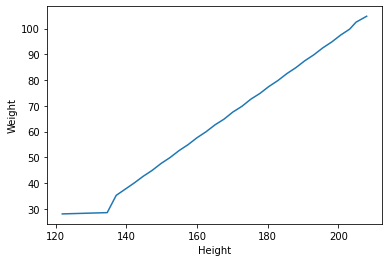

In [26]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

df = pd.read_csv("Height_Weight_single_variable_data_101_series_1.0.csv")
df = df.dropna(axis=0)

y = df.Weight.values
x = df.Height.values

plt.plot(x,y)
plt.ylabel('Weight')
plt.xlabel('Height')
plt.show()

In [27]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
reg = LinearRegression().fit(x, y)
print(reg.coef_)
print(reg.intercept_)

y_hat = reg.coef_[0][0]*x + reg.intercept_[0]
print("y_hat = ",reg.coef_[0][0],"x + ",reg.intercept_[0])

[[0.96001838]]
[-95.66248461]
y_hat =  0.9600183750530673 x +  -95.6624846143313


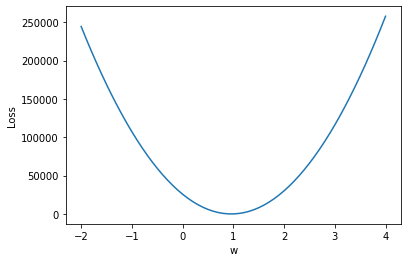

In [28]:
def forward(x):
  return x*w + reg.intercept_

def loss(x,y):
  y_pred = forward(x)
  return (y_pred - y) * (y_pred - y)

w_list = []
mse_list = []

for w in np.arange(-2.0, 4.1, 0.1):
    l_sum = 0
    for x_val,y_val in zip(x, y):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l
    w_list.append(w)
    mse_list.append(l_sum/len(y))
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

2. [Exercise 3-1] 아래 w1, w2의 gradient를 손으로 풀어서 구해보고, 구한 결과를 Python code로
구현하시오.

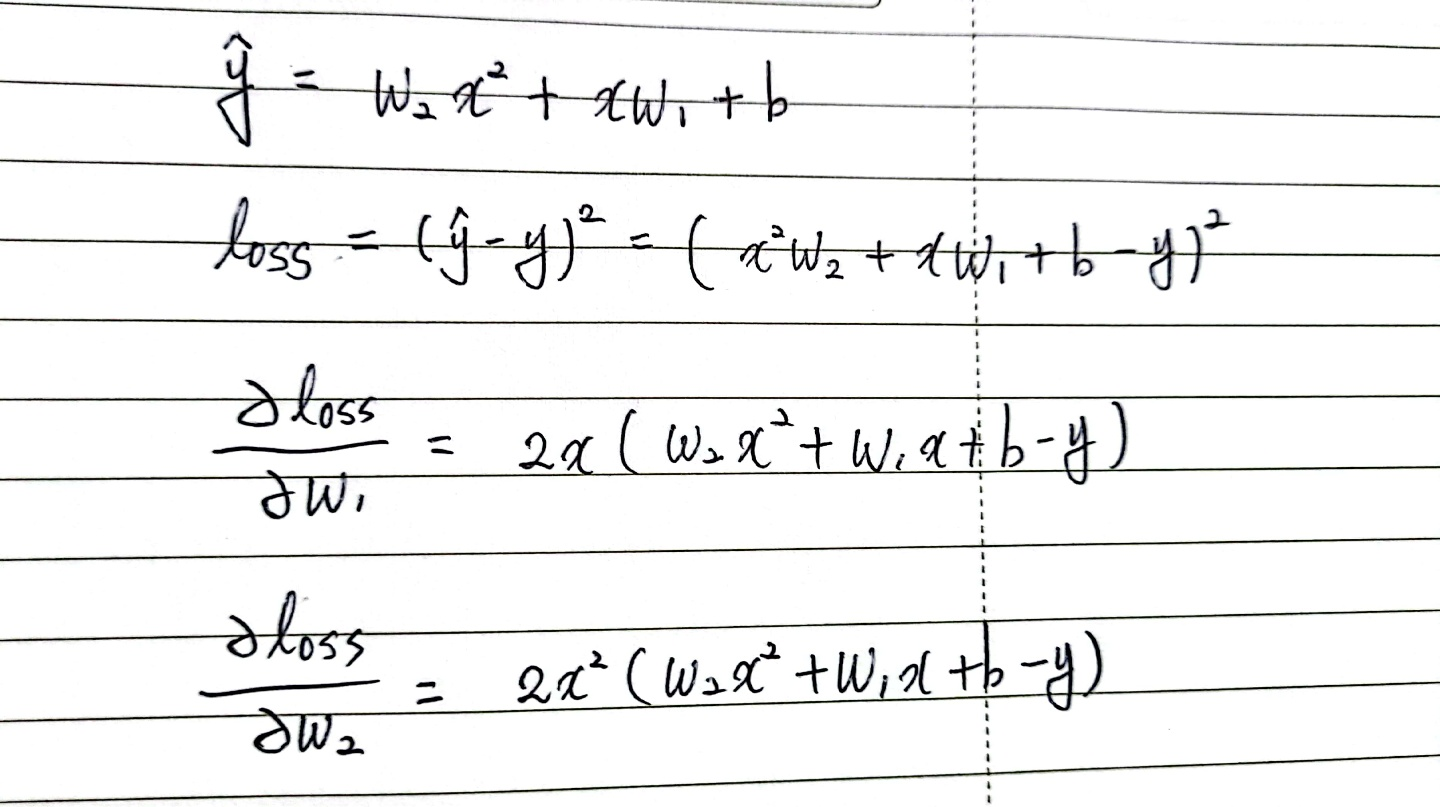

In [25]:
from sympy import *

x = Symbol('x')
y = Symbol('y')
w2 = Symbol('w2')
w1 = Symbol('w1')
b = Symbol('b')

y_hat = (x**2)*w2 + x * w1 + b
loss = (y_hat - y)**2
loss_w1 = loss.diff(w1)
print("partial derivative w1 : ", loss_w1)
print()

loss_w2 = loss.diff(w2)
print("partial derivative w2 : ", loss_w2)

partial derivative w1 :  2*x*(b + w1*x + w2*x**2 - y)

partial derivative w2 :  2*x**2*(b + w1*x + w2*x**2 - y)
